# Data Exploration

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import pgeocode
from sklearn.neighbors import DistanceMetric
from math import radians
import matplotlib.pyplot as plt
import seaborn as sns

### Data set 1: Olist Customers

In [2]:
data1_customers = pd.read_csv('brazilian_e_commerce_public/data_sets/1_olist_customers_dataset.csv')
data1_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
data1_customers.count()

customer_id                 99441
customer_unique_id          99441
customer_zip_code_prefix    99441
customer_city               99441
customer_state              99441
dtype: int64

In [4]:
data1_customers.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [5]:
data1_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [6]:
#data1_customers.to_csv('final_datasets/data1f_customers.csv')

In [7]:
data1_customers = data1_customers.rename(columns={'customer_zip_code_prefix': 'zip_code_prefix'})

In [8]:
data1_customers.head()

,customer_id,customer_unique_id,zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### Data set 2: Olist Geolocation

In [9]:
data2_geolocation = pd.read_csv('brazilian_e_commerce_public/data_sets/2_olist_geolocation_dataset.csv')
data2_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [10]:
data2_geolocation.count()

geolocation_zip_code_prefix    1000163
geolocation_lat                1000163
geolocation_lng                1000163
geolocation_city               1000163
geolocation_state              1000163
dtype: int64

In [11]:
data2_geolocation.columns

Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

In [12]:
data2_geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [13]:
data2_geolocation = data2_geolocation.rename(columns={'geolocation_zip_code_prefix': 'zip_code_prefix'})

In [14]:
data2_geolocation.head()

,zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [15]:
data2_geolocation2 = data2_geolocation.drop_duplicates(subset=['zip_code_prefix'])
data2_geolocation2 = data2_geolocation2.drop(columns=['geolocation_lat', 'geolocation_lng'])
data2_geolocation2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19015 entries, 0 to 999846
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   zip_code_prefix    19015 non-null  int64 
 1   geolocation_city   19015 non-null  object
 2   geolocation_state  19015 non-null  object
dtypes: int64(1), object(2)
memory usage: 594.2+ KB


In [16]:
data2_geolocation['zip_code_prefix'].unique()

array([ 1037,  1046,  1041, ..., 99910, 99920, 99952])

In [17]:
geolocation_lat= pd.DataFrame(data2_geolocation.groupby('zip_code_prefix')['geolocation_lat'].mean())
geolocation_lat

,geolocation_lat
zip_code_prefix,
1001,-23.550190
1002,-23.548146
1003,-23.548994
1004,-23.549799
1005,-23.549456
...,...
99960,-27.953722
99965,-28.183372
99970,-28.343766


In [18]:
geolocation_lng= pd.DataFrame(data2_geolocation.groupby('zip_code_prefix')['geolocation_lng'].mean())
geolocation_lng

,geolocation_lng
zip_code_prefix,
1001,-46.634024
1002,-46.634979
1003,-46.635731
1004,-46.634757
1005,-46.636733
...,...
99960,-52.025511
99965,-52.039850
99970,-51.874689


In [19]:
coordinates= geolocation_lat.merge(geolocation_lng, how='left',on= 'zip_code_prefix')
coordinates

,geolocation_lat,geolocation_lng
zip_code_prefix,,
1001,-23.550190,-46.634024
1002,-23.548146,-46.634979
1003,-23.548994,-46.635731
1004,-23.549799,-46.634757
1005,-23.549456,-46.636733
...,...,...
99960,-27.953722,-52.025511
99965,-28.183372,-52.039850
99970,-28.343766,-51.874689


In [20]:
data2_geolocation= data2_geolocation2.merge(coordinates, how='left',on= 'zip_code_prefix')

In [21]:
data2_geolocation.head()

,zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,1037,sao paulo,SP,-23.545411,-46.638924
1,1046,sao paulo,SP,-23.545930,-46.643998
2,1041,sao paulo,SP,-23.543905,-46.640046
3,1035,sao paulo,SP,-23.541614,-46.641549
4,1012,são paulo,SP,-23.547790,-46.634859


In [22]:
data1_customers= data1_customers.merge(data2_geolocation, how='left',on= 'zip_code_prefix')

In [23]:
data1_customers= data1_customers.drop(columns=['geolocation_city', 'geolocation_state'])

In [24]:
data1_customers = data1_customers.rename(columns={'zip_code_prefix': 'zip_code_prefix_customer','geolocation_lat': 'geolocation_lat_customer','geolocation_lng': 'geolocation_lng_customer'})

In [25]:
data1_customers.head()

,customer_id,customer_unique_id,zip_code_prefix_customer,customer_city,customer_state,geolocation_lat_customer,geolocation_lng_customer
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.727992,-46.542848
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.499702,-46.185233
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.975100,-47.142925


### Data set 3: Olist Order Items

In [26]:
data3_items = pd.read_csv('brazilian_e_commerce_public/data_sets/3_olist_order_items_dataset.csv')
data3_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [27]:
data3_items.count()

order_id               112650
order_item_id          112650
product_id             112650
seller_id              112650
shipping_limit_date    112650
price                  112650
freight_value          112650
dtype: int64

In [28]:
data3_items.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [29]:
data3_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [30]:
data3_items['shipping_limit_date']=  pd.to_datetime(data3_items['shipping_limit_date'])

In [31]:
data3_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [32]:
data3_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [33]:
data3_items['shipping_limit_date_only'] = data3_items['shipping_limit_date'].dt.strftime("%m-%d-%Y")

In [34]:
data3_items['shipping_limit_date_hour'] = data3_items['shipping_limit_date'].dt.time

In [35]:
data3_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,shipping_limit_date_only,shipping_limit_date_hour
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,09-19-2017,09:45:35
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,05-03-2017,11:05:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,01-18-2018,14:48:30
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,08-15-2018,10:10:18
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,02-13-2017,13:57:51


In [36]:
data3_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  112650 non-null  object        
 1   order_item_id             112650 non-null  int64         
 2   product_id                112650 non-null  object        
 3   seller_id                 112650 non-null  object        
 4   shipping_limit_date       112650 non-null  datetime64[ns]
 5   price                     112650 non-null  float64       
 6   freight_value             112650 non-null  float64       
 7   shipping_limit_date_only  112650 non-null  object        
 8   shipping_limit_date_hour  112650 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 7.7+ MB


In [37]:
data3_items['shipping_limit_date_only'] = pd.to_datetime(data3_items['shipping_limit_date_only'])

In [38]:
#data3_items['shipping_limit_date_hour']=  pd.to_datetime(data3_items['shipping_limit_date_hour'],format= '%H:%M:%S' ).dt.time

In [39]:
data3_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,shipping_limit_date_only,shipping_limit_date_hour
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,2017-09-19,09:45:35
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,2017-05-03,11:05:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,2018-01-18,14:48:30
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,2018-08-15,10:10:18
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,2017-02-13,13:57:51


In [40]:
data3_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  112650 non-null  object        
 1   order_item_id             112650 non-null  int64         
 2   product_id                112650 non-null  object        
 3   seller_id                 112650 non-null  object        
 4   shipping_limit_date       112650 non-null  datetime64[ns]
 5   price                     112650 non-null  float64       
 6   freight_value             112650 non-null  float64       
 7   shipping_limit_date_only  112650 non-null  datetime64[ns]
 8   shipping_limit_date_hour  112650 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 7.7+ MB


In [41]:
#data3_items.to_csv('final_datasets/data3f_items.csv')

### Data set 4: Olist order payments

In [42]:
data4_payments= pd.read_csv('brazilian_e_commerce_public/data_sets/4_olist_order_payments_dataset.csv')
data4_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [43]:
data4_payments.count()

order_id                103886
payment_sequential      103886
payment_type            103886
payment_installments    103886
payment_value           103886
dtype: int64

In [44]:
data4_payments.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [45]:
data4_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


### Data set 5: Olist order reviews

In [46]:
data5_reviews= pd.read_csv('brazilian_e_commerce_public/data_sets/5_olist_order_reviews_dataset.csv')
data5_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [47]:
data5_reviews.count()

review_id                  99224
order_id                   99224
review_score               99224
review_comment_title       11568
review_comment_message     40977
review_creation_date       99224
review_answer_timestamp    99224
dtype: int64

In [48]:
data5_reviews.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

In [49]:
data5_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [50]:
data5_reviews['review_creation_date']=  pd.to_datetime(data5_reviews['review_creation_date'])
data5_reviews['review_answer_timestamp']=  pd.to_datetime(data5_reviews['review_answer_timestamp'])

In [51]:
data5_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


In [52]:
data5_reviews['review_answer_timestamp_date_only'] = data5_reviews['review_answer_timestamp'].dt.strftime("%m-%d-%Y")
data5_reviews['review_answer_timestamp_hour'] = data5_reviews['review_answer_timestamp'].dt.time

In [53]:
data5_reviews['review_answer_timestamp_date_only']= pd.to_datetime(data5_reviews['review_answer_timestamp_date_only'])

In [54]:
#data5_reviews['review_answer_timestamp_hour']= pd.to_datetime(data5_reviews['review_answer_timestamp_hour'])

In [55]:
data5_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_answer_timestamp_date_only,review_answer_timestamp_hour
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59,2018-01-18,21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13,2018-03-11,03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24,2018-02-18,14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,2017-04-21,22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53,2018-03-02,10:26:53


In [56]:
data5_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   review_id                          99224 non-null  object        
 1   order_id                           99224 non-null  object        
 2   review_score                       99224 non-null  int64         
 3   review_comment_title               11568 non-null  object        
 4   review_comment_message             40977 non-null  object        
 5   review_creation_date               99224 non-null  datetime64[ns]
 6   review_answer_timestamp            99224 non-null  datetime64[ns]
 7   review_answer_timestamp_date_only  99224 non-null  datetime64[ns]
 8   review_answer_timestamp_hour       99224 non-null  object        
dtypes: datetime64[ns](3), int64(1), object(5)
memory usage: 6.8+ MB


In [57]:
data5_reviews['review_creation_answer_delta_hours']=  (data5_reviews['review_answer_timestamp']-data5_reviews['review_creation_date'])

In [58]:
data5_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_answer_timestamp_date_only,review_answer_timestamp_hour,review_creation_answer_delta_hours
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59,2018-01-18,21:46:59,0 days 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13,2018-03-11,03:05:13,1 days 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24,2018-02-18,14:36:24,1 days 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,2017-04-21,22:02:06,0 days 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53,2018-03-02,10:26:53,1 days 10:26:53


In [59]:
#complain_191= data5_reviews.loc[data5_reviews['order_id'].isin(['47b40429ed8cce3aee9199792275433f'])]

#print(complain_191['review_comment_message'])

### Data set 6: Olist Orders

In [60]:
data6_orders= pd.read_csv('brazilian_e_commerce_public/data_sets/6_olist_orders_dataset.csv')
data6_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [61]:
data6_orders.count()

order_id                         99441
customer_id                      99441
order_status                     99441
order_purchase_timestamp         99441
order_approved_at                99281
order_delivered_carrier_date     97658
order_delivered_customer_date    96476
order_estimated_delivery_date    99441
dtype: int64

In [62]:
data6_orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [63]:
data6_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [64]:
data6_orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [65]:
data6_orders = data6_orders.dropna()

In [66]:
data6_orders.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [67]:
data6_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96461 non-null  object
 1   customer_id                    96461 non-null  object
 2   order_status                   96461 non-null  object
 3   order_purchase_timestamp       96461 non-null  object
 4   order_approved_at              96461 non-null  object
 5   order_delivered_carrier_date   96461 non-null  object
 6   order_delivered_customer_date  96461 non-null  object
 7   order_estimated_delivery_date  96461 non-null  object
dtypes: object(8)
memory usage: 6.6+ MB


In [68]:
data6_orders['order_purchase_timestamp']=  pd.to_datetime(data6_orders['order_purchase_timestamp'])
data6_orders['order_approved_at']=  pd.to_datetime(data6_orders['order_approved_at'])
data6_orders['order_delivered_carrier_date']=  pd.to_datetime(data6_orders['order_delivered_carrier_date'])
data6_orders['order_delivered_customer_date']=  pd.to_datetime(data6_orders['order_delivered_customer_date'])
data6_orders['order_estimated_delivery_date']=  pd.to_datetime(data6_orders['order_estimated_delivery_date'])

In [69]:
data6_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


In [70]:
data6_orders['delta_purchase_approved'] =  (data6_orders['order_approved_at'] - data6_orders['order_purchase_timestamp']).astype('timedelta64[h]')
data6_orders['delta_purchase_delivered_carrier'] = (data6_orders['order_delivered_carrier_date'] - data6_orders['order_purchase_timestamp']).astype('timedelta64[h]')
data6_orders['delta_purchase_delivered_customer'] =  (data6_orders['order_delivered_customer_date'] - data6_orders['order_purchase_timestamp']).astype('timedelta64[h]')
data6_orders['delta_delivered_customer_carrier'] = (data6_orders['order_delivered_customer_date'] -  data6_orders['order_delivered_carrier_date']).astype('timedelta64[h]')
data6_orders['delta_delivered_customer_order_estimated_delivery_'] = (data6_orders['order_estimated_delivery_date'] - data6_orders['order_delivered_customer_date']).astype('timedelta64[h]')

In [71]:
data6_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delta_purchase_approved,delta_purchase_delivered_carrier,delta_purchase_delivered_customer,delta_delivered_customer_carrier,delta_delivered_customer_order_estimated_delivery_
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0.0,56.0,202.0,145.0,170.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,30.0,41.0,330.0,288.0,128.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0.0,5.0,225.0,220.0,413.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0.0,90.0,317.0,226.0,311.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,22.0,68.0,46.0,221.0


In [72]:
#data6_orders.loc[data6_orders['order_id'].isin(['47b40429ed8cce3aee9199792275433f'])]

In [73]:
data3_items.loc[data3_items['order_id'].isin(['e481f51cbdc54678b7cc49136f2d6af7','53cdb2fc8bc7dce0b6741e2150273451','47770eb9100c2d0c44946d9cf07ec65d','949d5b44dbf5de918fe9c16f97b45f8a','ad21c59c0840e6cb83a9ceb5573f8159'])]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,shipping_limit_date_only,shipping_limit_date_hour
31504,47770eb9100c2d0c44946d9cf07ec65d,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,2018-08-13,08:55:23
36896,53cdb2fc8bc7dce0b6741e2150273451,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,2018-07-30,03:24:27
65021,949d5b44dbf5de918fe9c16f97b45f8a,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,2017-11-23,19:45:59
76043,ad21c59c0840e6cb83a9ceb5573f8159,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,2018-02-19,20:31:37
100785,e481f51cbdc54678b7cc49136f2d6af7,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2017-10-06,11:07:15


In [74]:
# The 'shipping_limit_date' from table 'data3_items' is not in between the 'order_delivered_carrier_date' and 'order_delivered_customer_date' from table 'data6_orders' nor 'order_approved_at' and 'order_delivered_carrier_date'

In [75]:
#data6_orders.to_csv('final_datasets/data6f_orders_items.csv')

### Data set 7: Olist Products

In [76]:
data7_products= pd.read_csv('brazilian_e_commerce_public/data_sets/7_olist_products_dataset.csv')
data7_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [77]:
data7_products.count()

product_id                    32951
product_category_name         32341
product_name_lenght           32341
product_description_lenght    32341
product_photos_qty            32341
product_weight_g              32949
product_length_cm             32949
product_height_cm             32949
product_width_cm              32949
dtype: int64

In [78]:
data7_products.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [79]:
data7_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


### Data set 8: Olist sellers

In [80]:
data8_sellers= pd.read_csv('brazilian_e_commerce_public/data_sets/8_olist_sellers_dataset.csv')
data8_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [81]:
data8_sellers.count()

seller_id                 3095
seller_zip_code_prefix    3095
seller_city               3095
seller_state              3095
dtype: int64

In [82]:
data8_sellers.columns

Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object')

In [83]:
data8_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [84]:
#data8_sellers.to_csv('final_datasets/data8f_sellers.csv')

In [85]:
data8_sellers = data8_sellers.rename(columns={'seller_zip_code_prefix': 'zip_code_prefix'})

In [86]:
data8_sellers= data8_sellers.merge(data2_geolocation, how='left',on= 'zip_code_prefix')

In [87]:
data8_sellers.head()

,seller_id,zip_code_prefix,seller_city,seller_state,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,campinas,SP,-22.893848,-47.061337
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,mogi-guacu,SP,-22.383437,-46.947927
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ,rio de janeiro,RJ,-22.909572,-43.177703
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP,sao paulo,SP,-23.657242,-46.612831
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP,bragança paulista,SP,-22.964803,-46.534419


In [88]:
data8_sellers= data8_sellers.drop(columns=['geolocation_city', 'geolocation_state'])

In [89]:
data8_sellers = data8_sellers.rename(columns={'zip_code_prefix': 'zip_code_prefix_seller','geolocation_lat': 'geolocation_lat_seller','geolocation_lng': 'geolocation_lng_seller'})

In [90]:
data8_sellers.head()

,seller_id,zip_code_prefix_seller,seller_city,seller_state,geolocation_lat_seller,geolocation_lng_seller
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.893848,-47.061337
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,-22.383437,-46.947927
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ,-22.909572,-43.177703
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP,-23.657242,-46.612831
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP,-22.964803,-46.534419


In [91]:
data8_sellers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3095 entries, 0 to 3094
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   seller_id               3095 non-null   object 
 1   zip_code_prefix_seller  3095 non-null   int64  
 2   seller_city             3095 non-null   object 
 3   seller_state            3095 non-null   object 
 4   geolocation_lat_seller  3088 non-null   float64
 5   geolocation_lng_seller  3088 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 169.3+ KB


In [92]:
#data8_sellers['zip_code_prefix_seller'] = data8_sellers['zip_code_prefix_seller'].astype('int')

### Data set 9: Product category name translation

In [93]:
data9_translation= pd.read_csv('brazilian_e_commerce_public/data_sets/9_product_category_name_translation.csv')
data9_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [94]:
data9_translation.count()

product_category_name            71
product_category_name_english    71
dtype: int64

In [95]:
data9_translation.columns

Index(['product_category_name', 'product_category_name_english'], dtype='object')

In [96]:
data9_translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [97]:
states_brazil_list = {'north_region':[('Acre','AC'),('Amapá','AP'),('Amazonas','AM'),('Pará','PA'),('Rondônia','RO'),('Roraima','RR'),('Tocantins','TO')],
                      'northeast': [('Alagoas','AL'),('Bahia','BA'),('Ceará','CE'),('Maranhão','MA'),('Paraíba','PB'),('Pernambuco','PE'), ('Piauí','PI'), ('Rio Grande do Norte','RN'), ('Sergipe','SE')],
                      'central_west':[('Goiás','GO'),('Mato Grosso','MT'),('Mato Grosso do Sul','MS'),('Brasília','DF')],
                      'southeast':[('Espírito Santo','ES'),('Minas Gerais','MG'),('Rio de Janeiro','RJ'),('São Paulo','SP')],
                      'south':[('Paraná','PR'),('Santa Catarina','SC'),('Rio Grande do Sul','RS')]}

In [98]:
regions_df1 = pd.DataFrame(states_brazil_list['north_region'], columns= ['state','sc_state'])
regions_df1['region']= 'north_region'
regions_df1

,state,sc_state,region
0,Acre,AC,north_region
1,Amapá,AP,north_region
2,Amazonas,AM,north_region
3,Pará,PA,north_region
4,Rondônia,RO,north_region
5,Roraima,RR,north_region
6,Tocantins,TO,north_region


In [99]:
regions_df2 = pd.DataFrame(states_brazil_list['northeast'], columns= ['state','sc_state'])
regions_df2['region']= 'northeast'
regions_df2

,state,sc_state,region
0,Alagoas,AL,northeast
1,Bahia,BA,northeast
2,Ceará,CE,northeast
3,Maranhão,MA,northeast
4,Paraíba,PB,northeast
5,Pernambuco,PE,northeast
6,Piauí,PI,northeast
7,Rio Grande do Norte,RN,northeast
8,Sergipe,SE,northeast


In [100]:
regions_df3 = pd.DataFrame(states_brazil_list['central_west'], columns= ['state','sc_state'])
regions_df3['region']= 'central_west'
regions_df3

,state,sc_state,region
0,Goiás,GO,central_west
1,Mato Grosso,MT,central_west
2,Mato Grosso do Sul,MS,central_west
3,Brasília,DF,central_west


In [101]:
regions_df4 = pd.DataFrame(states_brazil_list['southeast'], columns= ['state','sc_state'])
regions_df4['region']= 'southeast'
regions_df4

,state,sc_state,region
0,Espírito Santo,ES,southeast
1,Minas Gerais,MG,southeast
2,Rio de Janeiro,RJ,southeast
3,São Paulo,SP,southeast


In [102]:
regions_df5 = pd.DataFrame(states_brazil_list['south'], columns= ['state','sc_state'])
regions_df5['region']= 'south'
regions_df5

,state,sc_state,region
0,Paraná,PR,south
1,Santa Catarina,SC,south
2,Rio Grande do Sul,RS,south


In [103]:
#regions_cities= pd.DataFrame()

#region_dict = {"city":[], "sc_city":[], "region":[]}

#for key in states_brazil_list.keys():
    #region_dict["city"].append(states_brazil_list[key][0][0])

In [104]:
#region_dict

In [105]:
regions_df = pd.concat([regions_df1, regions_df2, regions_df3, regions_df4, regions_df5], ignore_index=True)
regions_df 

,state,sc_state,region
0,Acre,AC,north_region
1,Amapá,AP,north_region
2,Amazonas,AM,north_region
3,Pará,PA,north_region
4,Rondônia,RO,north_region
5,Roraima,RR,north_region
6,Tocantins,TO,north_region
7,Alagoas,AL,northeast
8,Bahia,BA,northeast
9,Ceará,CE,northeast


In [106]:
data1_customers.head()

,customer_id,customer_unique_id,zip_code_prefix_customer,customer_city,customer_state,geolocation_lat_customer,geolocation_lng_customer
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.727992,-46.542848
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.499702,-46.185233
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.975100,-47.142925


In [107]:
data1_customers = data1_customers.rename(columns={"customer_state": 'sc_state'})

In [108]:
data1_customers= data1_customers.merge(regions_df, how='outer',on= 'sc_state')

In [109]:
data1_customers.head()

,customer_id,customer_unique_id,zip_code_prefix_customer,customer_city,sc_state,geolocation_lat_customer,geolocation_lng_customer,state,region
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929,São Paulo,southeast
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.727992,-46.542848,São Paulo,southeast
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289,São Paulo,southeast
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.499702,-46.185233,São Paulo,southeast
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.975100,-47.142925,São Paulo,southeast


In [110]:
data1_customers = data1_customers.rename(columns={'sc_state': 'sc_state_customer','state':'state_customer','region':'region_customer'})

In [111]:
data8_sellers = data8_sellers.rename(columns={"seller_state": 'sc_state'})

In [112]:
data8_sellers= data8_sellers.merge(regions_df, how='outer',on= 'sc_state')
data8_sellers.head()

,seller_id,zip_code_prefix_seller,seller_city,sc_state,geolocation_lat_seller,geolocation_lng_seller,state,region
0,3442f8959a84dea7ee197c632cb2df15,13023.0,campinas,SP,-22.893848,-47.061337,São Paulo,southeast
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844.0,mogi guacu,SP,-22.383437,-46.947927,São Paulo,southeast
2,c0f3eea2e14555b6faeea3dd58c1b1c3,4195.0,sao paulo,SP,-23.657242,-46.612831,São Paulo,southeast
3,51a04a8a6bdcb23deccc82b0b80742cf,12914.0,braganca paulista,SP,-22.964803,-46.534419,São Paulo,southeast
4,1b938a7ec6ac5061a66a3766e0e75f90,16304.0,penapolis,SP,-21.437403,-50.076931,São Paulo,southeast


In [113]:
data8_sellers = data8_sellers.rename(columns={'sc_state': 'sc_state_seller','state':'state_seller','region':'region_seller'})

In [114]:
data1_customers.head()

,customer_id,customer_unique_id,zip_code_prefix_customer,customer_city,sc_state_customer,geolocation_lat_customer,geolocation_lng_customer,state_customer,region_customer
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929,São Paulo,southeast
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.727992,-46.542848,São Paulo,southeast
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289,São Paulo,southeast
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.499702,-46.185233,São Paulo,southeast
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.975100,-47.142925,São Paulo,southeast


In [115]:
data6_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delta_purchase_approved,delta_purchase_delivered_carrier,delta_purchase_delivered_customer,delta_delivered_customer_carrier,delta_delivered_customer_order_estimated_delivery_
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0.0,56.0,202.0,145.0,170.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,30.0,41.0,330.0,288.0,128.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0.0,5.0,225.0,220.0,413.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0.0,90.0,317.0,226.0,311.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,22.0,68.0,46.0,221.0


## Distance Between Customer and Seller

In [116]:
customers_orders= data1_customers.merge(data6_orders, how='left',on= 'customer_id')

In [117]:
customers_orders.head()

,customer_id,customer_unique_id,zip_code_prefix_customer,customer_city,sc_state_customer,geolocation_lat_customer,geolocation_lng_customer,state_customer,region_customer,order_id,...,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delta_purchase_approved,delta_purchase_delivered_carrier,delta_purchase_delivered_customer,delta_delivered_customer_carrier,delta_delivered_customer_order_estimated_delivery_
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929,São Paulo,southeast,00e7ee1b050b8499577073aeb2a297a1,...,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,0.0,163.0,211.0,47.0,253.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.727992,-46.542848,São Paulo,southeast,29150127e6685892b6eab3eec79f59c7,...,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,0.0,68.0,399.0,331.0,179.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289,São Paulo,southeast,b2059ed67ce144a36e2aa97d2c9e9ad2,...,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,24.0,550.0,625.0,75.0,-42.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.499702,-46.185233,São Paulo,southeast,951670f92359f4fe4a63112aa7306eba,...,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0,343.0,359.0,16.0,295.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.975100,-47.142925,São Paulo,southeast,6b7d50bd145f6fc7f33cebabd7e49d0f,...,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,0.0,29.0,275.0,245.0,123.0


In [118]:
data3_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,shipping_limit_date_only,shipping_limit_date_hour
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,2017-09-19,09:45:35
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,2017-05-03,11:05:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,2018-01-18,14:48:30
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,2018-08-15,10:10:18
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,2017-02-13,13:57:51


In [119]:
customers_orders_item = customers_orders.merge(data3_items, how='inner',on= 'order_id')

In [120]:
customers_orders_item.head()

,customer_id,customer_unique_id,zip_code_prefix_customer,customer_city,sc_state_customer,geolocation_lat_customer,geolocation_lng_customer,state_customer,region_customer,order_id,...,delta_delivered_customer_carrier,delta_delivered_customer_order_estimated_delivery_,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,shipping_limit_date_only,shipping_limit_date_hour
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929,São Paulo,southeast,00e7ee1b050b8499577073aeb2a297a1,...,47.0,253.0,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,2017-05-22,15:22:12
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.727992,-46.542848,São Paulo,southeast,29150127e6685892b6eab3eec79f59c7,...,331.0,179.0,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,2018-01-18,20:58:32
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289,São Paulo,southeast,b2059ed67ce144a36e2aa97d2c9e9ad2,...,75.0,-42.0,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,2018-06-05,16:19:10
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.499702,-46.185233,São Paulo,southeast,951670f92359f4fe4a63112aa7306eba,...,16.0,295.0,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,2018-03-27,16:31:16
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.975100,-47.142925,São Paulo,southeast,6b7d50bd145f6fc7f33cebabd7e49d0f,...,245.0,123.0,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,2018-07-31,10:10:09


In [121]:
data8_sellers

,seller_id,zip_code_prefix_seller,seller_city,sc_state_seller,geolocation_lat_seller,geolocation_lng_seller,state_seller,region_seller
0,3442f8959a84dea7ee197c632cb2df15,13023.0,campinas,SP,-22.893848,-47.061337,São Paulo,southeast
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844.0,mogi guacu,SP,-22.383437,-46.947927,São Paulo,southeast
2,c0f3eea2e14555b6faeea3dd58c1b1c3,4195.0,sao paulo,SP,-23.657242,-46.612831,São Paulo,southeast
3,51a04a8a6bdcb23deccc82b0b80742cf,12914.0,braganca paulista,SP,-22.964803,-46.534419,São Paulo,southeast
4,1b938a7ec6ac5061a66a3766e0e75f90,16304.0,penapolis,SP,-21.437403,-50.076931,São Paulo,southeast
...,...,...,...,...,...,...,...,...
3094,67225bff54a172ff67579aaf583efd78,85960.0,marechal candido rondon,PA,-24.554525,-54.058525,Pará,north_region
3095,NaN,NaN,NaN,AP,NaN,NaN,Amapá,north_region
3096,NaN,NaN,NaN,RR,NaN,NaN,Roraima,north_region
3097,NaN,NaN,NaN,TO,NaN,NaN,Tocantins,north_region


In [122]:
customers_orders_item_sellers = customers_orders_item.merge(data8_sellers, how='left',on= 'seller_id')

In [123]:
customers_orders_item_sellers.head()

,customer_id,customer_unique_id,zip_code_prefix_customer,customer_city,sc_state_customer,geolocation_lat_customer,geolocation_lng_customer,state_customer,region_customer,order_id,...,freight_value,shipping_limit_date_only,shipping_limit_date_hour,zip_code_prefix_seller,seller_city,sc_state_seller,geolocation_lat_seller,geolocation_lng_seller,state_seller,region_seller
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929,São Paulo,southeast,00e7ee1b050b8499577073aeb2a297a1,...,21.88,2017-05-22,15:22:12,8577.0,itaquaquecetuba,SP,-23.486111,-46.366721,São Paulo,southeast
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.727992,-46.542848,São Paulo,southeast,29150127e6685892b6eab3eec79f59c7,...,46.48,2018-01-18,20:58:32,88303.0,itajai,SC,-26.912574,-48.673980,Santa Catarina,south
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289,São Paulo,southeast,b2059ed67ce144a36e2aa97d2c9e9ad2,...,17.79,2018-06-05,16:19:10,8577.0,itaquaquecetuba,SP,-23.486111,-46.366721,São Paulo,southeast
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.499702,-46.185233,São Paulo,southeast,951670f92359f4fe4a63112aa7306eba,...,23.36,2018-03-27,16:31:16,8577.0,itaquaquecetuba,SP,-23.486111,-46.366721,São Paulo,southeast
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.975100,-47.142925,São Paulo,southeast,6b7d50bd145f6fc7f33cebabd7e49d0f,...,22.25,2018-07-31,10:10:09,14940.0,ibitinga,SP,-21.757321,-48.829744,São Paulo,southeast


In [124]:
customers_orders_item_sellers['zip_code_prefix_seller'] = customers_orders_item_sellers['zip_code_prefix_seller'].astype('int')

In [125]:
customers_orders_item_sellers.head()

,customer_id,customer_unique_id,zip_code_prefix_customer,customer_city,sc_state_customer,geolocation_lat_customer,geolocation_lng_customer,state_customer,region_customer,order_id,...,freight_value,shipping_limit_date_only,shipping_limit_date_hour,zip_code_prefix_seller,seller_city,sc_state_seller,geolocation_lat_seller,geolocation_lng_seller,state_seller,region_seller
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929,São Paulo,southeast,00e7ee1b050b8499577073aeb2a297a1,...,21.88,2017-05-22,15:22:12,8577,itaquaquecetuba,SP,-23.486111,-46.366721,São Paulo,southeast
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.727992,-46.542848,São Paulo,southeast,29150127e6685892b6eab3eec79f59c7,...,46.48,2018-01-18,20:58:32,88303,itajai,SC,-26.912574,-48.673980,Santa Catarina,south
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289,São Paulo,southeast,b2059ed67ce144a36e2aa97d2c9e9ad2,...,17.79,2018-06-05,16:19:10,8577,itaquaquecetuba,SP,-23.486111,-46.366721,São Paulo,southeast
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.499702,-46.185233,São Paulo,southeast,951670f92359f4fe4a63112aa7306eba,...,23.36,2018-03-27,16:31:16,8577,itaquaquecetuba,SP,-23.486111,-46.366721,São Paulo,southeast
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.975100,-47.142925,São Paulo,southeast,6b7d50bd145f6fc7f33cebabd7e49d0f,...,22.25,2018-07-31,10:10:09,14940,ibitinga,SP,-21.757321,-48.829744,São Paulo,southeast


In [126]:
customers_orders_item_sellers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110180 entries, 0 to 110179
Data columns (total 36 columns):
 #   Column                                              Non-Null Count   Dtype         
---  ------                                              --------------   -----         
 0   customer_id                                         110180 non-null  object        
 1   customer_unique_id                                  110180 non-null  object        
 2   zip_code_prefix_customer                            110180 non-null  int64         
 3   customer_city                                       110180 non-null  object        
 4   sc_state_customer                                   110180 non-null  object        
 5   geolocation_lat_customer                            109892 non-null  float64       
 6   geolocation_lng_customer                            109892 non-null  float64       
 7   state_customer                                      110180 non-null  object        

## Calculating Distance Between Buyer and Seller

In [127]:
def haversine_vectorize(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    newlon = lon2 - lon1
    newlat = lat2 - lat1
    haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2
    dist = 2 * np.arcsin(np.sqrt(haver_formula))
    km = 6371 * dist
    return km

customers_orders_item_sellers['dist_in_km'] = round(haversine_vectorize(customers_orders_item_sellers['geolocation_lat_customer'], 
                                             customers_orders_item_sellers['geolocation_lng_customer'],
                                             customers_orders_item_sellers['geolocation_lat_seller'], 
                                             customers_orders_item_sellers['geolocation_lng_seller']), 3)

In [128]:
customers_orders_item_sellers.head()

,customer_id,customer_unique_id,zip_code_prefix_customer,customer_city,sc_state_customer,geolocation_lat_customer,geolocation_lng_customer,state_customer,region_customer,order_id,...,shipping_limit_date_only,shipping_limit_date_hour,zip_code_prefix_seller,seller_city,sc_state_seller,geolocation_lat_seller,geolocation_lng_seller,state_seller,region_seller,dist_in_km
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929,São Paulo,southeast,00e7ee1b050b8499577073aeb2a297a1,...,2017-05-22,15:22:12,8577,itaquaquecetuba,SP,-23.486111,-46.366721,São Paulo,southeast,254.302
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.727992,-46.542848,São Paulo,southeast,29150127e6685892b6eab3eec79f59c7,...,2018-01-18,20:58:32,88303,itajai,SC,-26.912574,-48.673980,Santa Catarina,south,336.323
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289,São Paulo,southeast,b2059ed67ce144a36e2aa97d2c9e9ad2,...,2018-06-05,16:19:10,8577,itaquaquecetuba,SP,-23.486111,-46.366721,São Paulo,southeast,32.386
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.499702,-46.185233,São Paulo,southeast,951670f92359f4fe4a63112aa7306eba,...,2018-03-27,16:31:16,8577,itaquaquecetuba,SP,-23.486111,-46.366721,São Paulo,southeast,20.208
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.975100,-47.142925,São Paulo,southeast,6b7d50bd145f6fc7f33cebabd7e49d0f,...,2018-07-31,10:10:09,14940,ibitinga,SP,-21.757321,-48.829744,São Paulo,southeast,208.307


In [129]:
customers_orders_item_sellers['dist_in_km'].min()

0.0

In [130]:
customers_orders_item_sellers['dist_in_km'].max()

7717.566

(0.0, 2500.0)

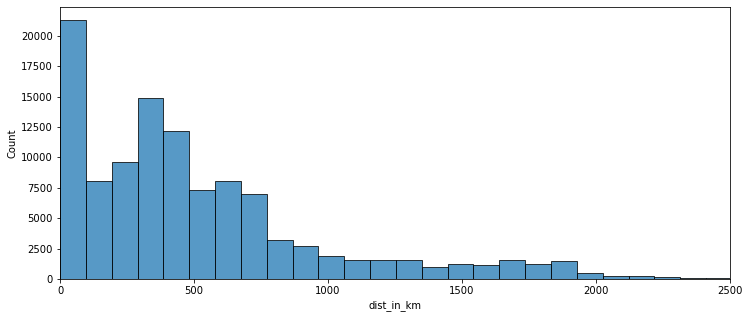

In [131]:
plt.subplots(figsize= (12,5))
sns.histplot(data=customers_orders_item_sellers,x='dist_in_km', bins=80)
plt.xlim(0, 2500)

Groups per distance between seller and customer. 

group_1: 0 - 100 
group_2: 101 - 300 
group_3: 301 - 500 
group_4: 501 - 700 
group_5: 701- 900
group_6: 901 - 1100
group_7: 1101 - 1500
group_8: 1501 - 2000
group_9: 2000 > 

In [132]:
distance_labels = ['group_1','group_2', 'group_3', 'group_4','group_5','group_6','group_7','group_8','group_9']
bin_boundaries = [   -0.1, 100,    301,       501,       701,      901,      1101,      1501,     2001,    7720 ]

In [133]:
customers_orders_item_sellers['distance_group']= pd.cut(customers_orders_item_sellers['dist_in_km'], bins=bin_boundaries, labels=distance_labels)

In [134]:
customers_orders_item_sellers.sample(10)

,customer_id,customer_unique_id,zip_code_prefix_customer,customer_city,sc_state_customer,geolocation_lat_customer,geolocation_lng_customer,state_customer,region_customer,order_id,...,shipping_limit_date_hour,zip_code_prefix_seller,seller_city,sc_state_seller,geolocation_lat_seller,geolocation_lng_seller,state_seller,region_seller,dist_in_km,distance_group
76770,608586e900ad910c56e2c4274a74b0b6,e45409a88f7d2e93004a28eebcd2378f,28470,santo antonio de padua,RJ,-21.552860,-42.196189,Rio de Janeiro,southeast,3f67dd72711194df0865dc9b59e4bdeb,...,03:10:13,13324,salto,SP,-23.209471,-47.309229,São Paulo,southeast,583.361,group_4
38642,87135d156578200c9b003917ce3cdc4e,cd2fa24d6cf522bf1736fd72429dbe56,14240,cajuru,SP,-21.274433,-47.305476,São Paulo,southeast,d8871dabf991b93f323970274f492e85,...,14:10:40,13232,campo limpo paulista,SP,-23.211746,-46.762875,São Paulo,southeast,158.729,group_2
78553,91de57e4716ed3deaf13a08b47fefaf5,545fa2ebe8244712cde860d8ad84e199,26276,nova iguacu,RJ,-22.747655,-43.500452,Rio de Janeiro,southeast,b5ac50103235f27b1d286960df625d1d,...,17:55:14,4362,sao paulo,SP,-23.645348,-46.668963,São Paulo,southeast,359.295,group_3
3839,92c291fb956084c69f94b7fedcac307a,87e551ceb471a0b2977a429609896111,6447,barueri,SP,-23.541452,-46.877157,São Paulo,southeast,8b96bc34084e85c00077915a55fa93f7,...,06:50:47,8550,poa,SP,-23.521944,-46.340875,São Paulo,southeast,59.650,group_1
31296,5c351d3b7eb465775ce1405dbe49cb23,574d82ac7c0699b8c47077533193ee8d,15093,sao jose do rio preto,SP,-20.855380,-49.411000,São Paulo,southeast,e4c540c341b9a50b1a1b28e71867eb5b,...,16:11:01,15015,sao jose do rio preto,SP,-20.819121,-49.379028,São Paulo,southeast,4.419,group_1
59429,1c7007c94573e6c01c8e30cc70bcf475,f8bc1d81f395f6239a2a5ab1b9edf1ab,30130,belo horizonte,MG,-19.931856,-43.932647,Minas Gerais,southeast,354170da2755821e9c7cdccbe277b0b2,...,15:35:06,14940,ibitinga,SP,-21.757321,-48.829744,São Paulo,southeast,562.202,group_4
42990,bafa1579d04b177aecfc4ae43af01b18,4926c6843cbc9a66f0524e37ca0945f5,13087,campinas,SP,-22.857990,-47.053051,São Paulo,southeast,a42f5a19988bcb397ae627a3a72eb735,...,16:50:13,18040,sorocaba,SP,-23.505548,-47.469705,São Paulo,southeast,67.338,group_1
11230,673b616061db61160a67e09d6a98a030,d40a1a6118775afed4f52618035724cd,12620,piquete,SP,-22.608907,-45.183313,São Paulo,southeast,b9964fe824ef79f3fe90110b41e048b2,...,13:49:22,4133,sao paulo,SP,-23.621738,-46.618384,São Paulo,southeast,177.776,group_2
5344,2c0447ab1223f91bff38da0d34153e1d,199e0c07498edac57c28ac45e7cff3ef,7241,guarulhos,SP,-23.446977,-46.426683,São Paulo,southeast,f201d0924f68c1eadbe0e527ae947481,...,18:31:34,4782,sao paulo,SP,-23.691013,-46.703810,São Paulo,southeast,36.023,group_1
107219,97041c16f13d77339e0066c4f41364a0,74ab4a6f4e5a53608b690cb501a86e68,78740,rondonopolis,MT,-16.475636,-54.616900,Mato Grosso,central_west,864bd5ba759c631c93986c49f5c42168,...,15:32:52,6341,carapicuiba,SP,-23.572518,-46.819953,São Paulo,southeast,999.489,group_6


In [135]:
customers_orders_item_sellers.isnull().sum()

customer_id                                             0
customer_unique_id                                      0
zip_code_prefix_customer                                0
customer_city                                           0
sc_state_customer                                       0
geolocation_lat_customer                              288
geolocation_lng_customer                              288
state_customer                                          0
region_customer                                         0
order_id                                                0
order_status                                            0
order_purchase_timestamp                                0
order_approved_at                                       0
order_delivered_carrier_date                            0
order_delivered_customer_date                           0
order_estimated_delivery_date                           0
delta_purchase_approved                                 0
delta_purchase

In [136]:
customers_orders_item_sellers.count()

customer_id                                           110180
customer_unique_id                                    110180
zip_code_prefix_customer                              110180
customer_city                                         110180
sc_state_customer                                     110180
geolocation_lat_customer                              109892
geolocation_lng_customer                              109892
state_customer                                        110180
region_customer                                       110180
order_id                                              110180
order_status                                          110180
order_purchase_timestamp                              110180
order_approved_at                                     110180
order_delivered_carrier_date                          110180
order_delivered_customer_date                         110180
order_estimated_delivery_date                         110180
delta_purchase_approved 

In [137]:
customers_orders_item_sellers.to_csv('final_datasets/data_f1_olist.csv', index= False)